<a href="https://colab.research.google.com/github/jfink09/Financial-Modeling/blob/Technical-Analysis/Using_SMAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set up plots
%matplotlib inline
%config InclineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt 
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
# Install Yahoo Finance 
!pip install --upgrade yfinance
import yfinance as yf

In [6]:
# Import other libraries
import pandas as pd

In [7]:
# Get stock quote (Boeing)
BA = yf.download("BA", start='2019-01-01', end='2020-06-20', progress=False)
BA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,316.190002,323.950012,313.709991,323.809998,314.645142,3292200
2019-01-03,319.489990,319.739990,309.399994,310.899994,302.100555,5705600
2019-01-04,316.690002,328.440002,316.079987,327.079987,317.822601,4448800
2019-01-07,330.519989,330.690002,323.350006,328.109985,318.823395,4030300
2019-01-08,334.109985,341.250000,332.649994,340.529999,330.891937,4736500
...,...,...,...,...,...,...
2020-06-15,177.179993,193.229996,175.889999,190.940002,190.940002,78612900
2020-06-16,207.149994,208.300003,192.600006,197.770004,197.770004,76496900
2020-06-17,194.520004,196.429993,191.250000,192.539993,192.539993,52892200


In [8]:
# Get the adjusted close price 
close = BA['Adj Close']
close.index = pd.to_datetime(close.index) # This converts the index to pandas datetime
close

Date
2019-01-02    314.645142
2019-01-03    302.100555
2019-01-04    317.822601
2019-01-07    318.823395
2019-01-08    330.891937
                 ...    
2020-06-15    190.940002
2020-06-16    197.770004
2020-06-17    192.539993
2020-06-18    192.289993
2020-06-19    187.020004
Name: Adj Close, Length: 370, dtype: float64

In [9]:
# Create moving averages (9-day 20-day 50-day 100-day 150-day 200-day)
sma50 = close.rolling(window=50).mean()
sma50.iloc[45:52]

sma9 = close.rolling(window=9).mean()
sma20 = close.rolling(window=20).mean()
sma100 = close.rolling(window=100).mean()
sma150 = close.rolling(window=150).mean()
sma200 = close.rolling(window=200).mean()

sma9
sma20
sma50
sma100
sma150
sma200

Date
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
                 ...    
2020-06-15    275.799717
2020-06-16    274.996055
2020-06-17    274.159571
2020-06-18    273.369623
2020-06-19    272.542898
Name: Adj Close, Length: 370, dtype: float64

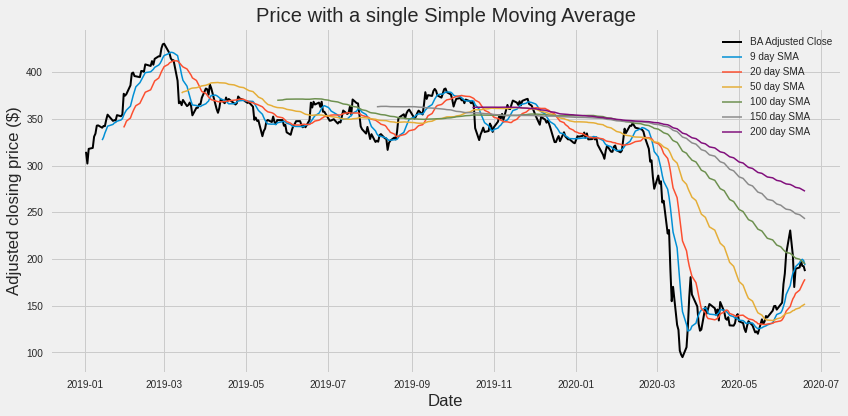

In [19]:
# Plot Boeing's price 
plt.style.use('fivethirtyeight')

plt.figure(figsize = (12,6))
plt.plot(close, label='BA Adjusted Close', linewidth = 2, color='#000000')
plt.plot(sma9, label='9 day SMA', linewidth = 1.5)
plt.plot(sma20, label='20 day SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day SMA', linewidth = 1.5)
plt.plot(sma100, label='100 day SMA', linewidth = 1.5)
plt.plot(sma150, label='150 day SMA', linewidth = 1.5)
plt.plot(sma200, label='200 day SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.tight_layout()